In [1]:
#upload the data
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs

# Replace 'your_file.csv' with the path to your CSV file
url="https://raw.githubusercontent.com/roeiraz12/project/main/onlinedeliverydata.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)


df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [2]:
df.shape

(388, 55)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [4]:
column_names = df.columns
column_names


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [5]:
#changing the text value in numeric values in some coulomns:


column_names = df.columns
column_names


#new dictionary 
mapping = {
    'Strongly agree': 5,
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}

#new dictionary 
mapping2 = {
    'Very Important': 5,
    'Important': 4,
    'Moderately Important': 3,
    'Slightly Important': 2,
    'Unimportant': 1
}

#new dictionary (עשיתי הפוך כי ככל שהתשובה יותר מוסכמת כך הציון הכולל יורד)  #--<<מה דעתכן על זה
mapping3 = {
    'Strongly agree': 1,
    'Strongly Agree': 1,
    'Agree': 2,
    'Neutral': 3,
    'Disagree': 4,
    'Strongly disagree': 5
}


# List of columns to apply the mappings to
columns = [
    'Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system',
    'Self Cooking', 'Health Concern', 'Unavailability', 'Residence in busy location',
    
    'Unaffordable','Delivery person ability', #?חייב לציין שלא הבנתי מה העמודות מכאן והלאה אומרות
     'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time']

columns2 = [
    'Less Delivery time',
    'High Quality of package', 'Number of calls', 'Politeness',
    'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity']

columns3 = [   
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Long delivery time', 'Delay of delivery person getting assigned','Delay of delivery person picking up food', 'Wrong order delivered',
    'Missing item', 'Order placed by mistake']
            
# Apply the mapping to each specified column using .map()
for col in columns:
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Apply the second mapping to each specified column using .map()
for col in columns2:
    if col in df.columns:
        df[col] = df[col].map(mapping2)

# Apply the third mapping to each specified column using .map()
for col in columns3:
    if col in df.columns:
        df[col] = df[col].map(mapping3)

# Display the updated dataframe
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,3,3,3,3,3,3,3,3,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,5,5,5,5,5,5,5,5,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,4,5,3,5,5,4,5,3,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,5,4,3,5,5,5,5,4,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,4,4,3,4,4,4,5,5,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,4,4,4,4,4,4,4,4,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,3,5,3,3,3,3,5,5,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,4,5,4,4,5,5,5,5,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,4,5,4,5,5,4,5,5,Yes,Language barrier is also one major issue. Mosl...


In [6]:
#creating a new coulomn called "Overall Rating" between 1-5:
#average rating of each category

columns_to_average = ['Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system', 'Delivery person ability','Less Delivery time','High Quality of package',
    'Politeness','Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience',
    'Long delivery time', 'Delay of delivery person getting assigned','Delay of delivery person picking up food','Wrong order delivered',
    'Missing item', 'Order placed by mistake']
df["Overall Rating"] = df[columns_to_average].mean(axis=1)


df[["Overall Rating"]] #we can see the overall rating of each castumer down here:

,Overall Rating
0,2.750000
1,3.041667
2,3.166667
3,3.541667
4,3.125000
...,...
383,3.041667
384,3.000000
385,2.958333
386,3.416667


In [7]:
#עשיתי ממוצע  לדירוג לכל שכבת גיל. הפלט יהיה בסדר יורד של הדירוג  
rating_df = df.groupby(['Age'])[['Overall Rating']].mean().reset_index().sort_values(by="Overall Rating" , ascending = False)
rating_df

,Age,Overall Rating
0,18,3.583333
2,20,3.486111
13,31,3.453125
3,21,3.436594
6,24,3.413333
1,19,3.406250
7,25,3.399840
4,22,3.397661
14,32,3.388021
10,28,3.380556


-0.59 :מקדם מתאם הקורולציה


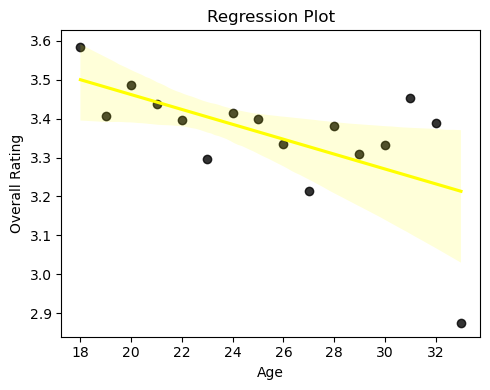

In [8]:
from scipy.stats import pearsonr

plt.figure(figsize=(5,4))
sns.regplot(x=rating_df["Age"], y=rating_df["Overall Rating"], line_kws={"color": "yellow"}, scatter_kws={"color": "black"})
plt.title('Regression Plot')
plt.xlabel('Age')
plt.ylabel("Overall Rating")

r_value, _ = pearsonr(rating_df["Age"], rating_df["Overall Rating"])
rounded_r_value = round(r_value, 2)
print(str(rounded_r_value)+" :מקדם מתאם הקורולציה")

plt.tight_layout()
plt.show()

In [9]:
# סינון השורות שבהן הגיל הוא בין 20 ל-30 (כולל)
filtered_df = df[(df['Age'] >= 20) & (df['Age'] <= 30)]

# בחירת העמודה 'Overall Rating' מה־DataFrame המקורי
overall_rating_df = df[['Overall Rating']]

# בחירת העמודה 'Age' מה־DataFrame המסונן
age_df = filtered_df[['Age']]

# שליחת שתי העמודות לפונקציה concat כדי ליצור DataFrame חדש
combined_df = pd.concat([overall_rating_df, age_df], axis=1)
combined_df

,Overall Rating,Age
0,2.750000,20.0
1,3.041667,24.0
2,3.166667,22.0
3,3.541667,22.0
4,3.125000,22.0
...,...,...
383,3.041667,23.0
384,3.000000,23.0
385,2.958333,22.0
386,3.416667,23.0


<Axes: >

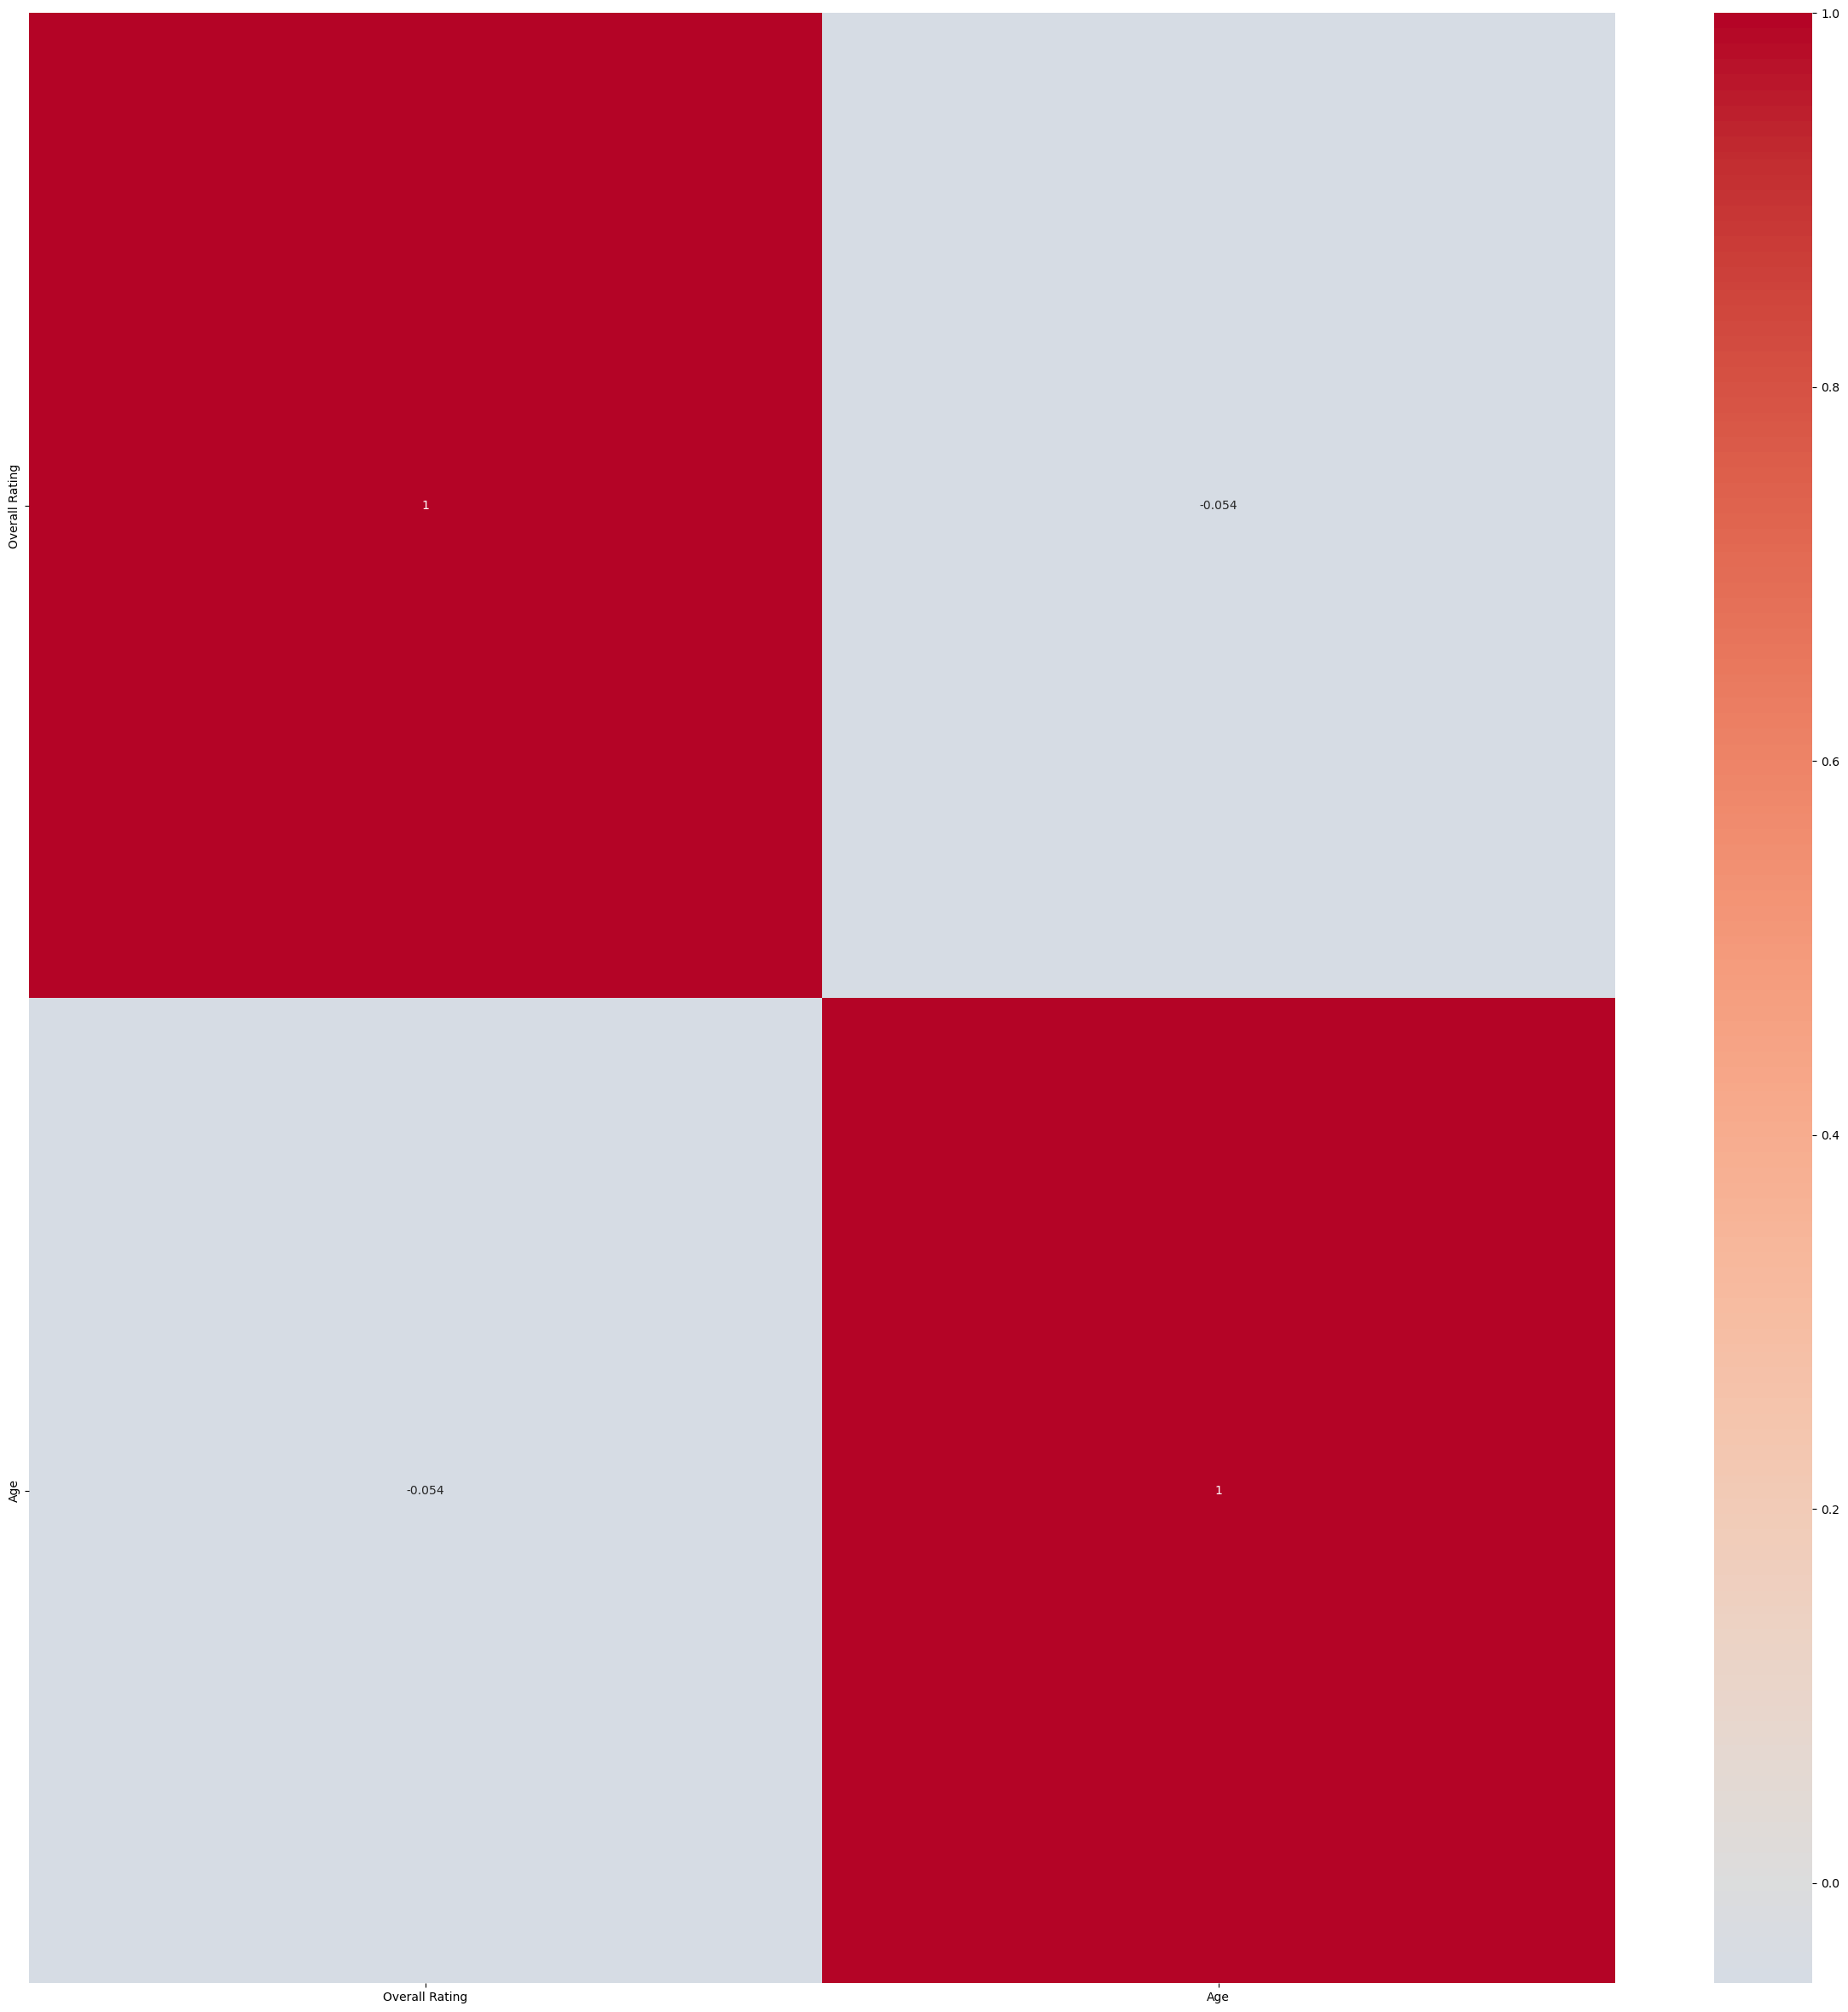

In [10]:
 #אין תיאום בין הקורלציה הקודמת לזו משהו ממש מוזר
corrs = combined_df.corr(method = 'kendall', numeric_only=True)
plt.figure(figsize=(30,30))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

סתם

In [11]:
df.describe()

,Age,Family size,latitude,longitude,Pin code,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,...,Delivery person ability,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Overall Rating
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402,3.760309,3.744845,2.221649,3.590206,2.456186,...,3.703608,3.814433,3.940722,3.590206,3.865979,3.855670,3.958763,4.255155,4.211340,3.364261
std,2.975593,1.351025,0.044489,0.051354,31.399609,0.976082,1.124934,1.084228,1.167876,1.190244,...,1.010174,0.833161,0.969345,1.141017,1.028070,1.104276,0.919696,0.865264,0.904582,0.340525
min,18.000000,1.000000,12.865200,77.484200,560001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.375000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000,4.000000,3.000000,1.000000,3.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.125000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000,4.000000,4.000000,2.000000,4.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.333333
75%,26.000000,4.000000,12.997025,77.630900,560068.000000,4.000000,5.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.583333
max,33.000000,6.000000,13.102000,77.758200,560109.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.416667


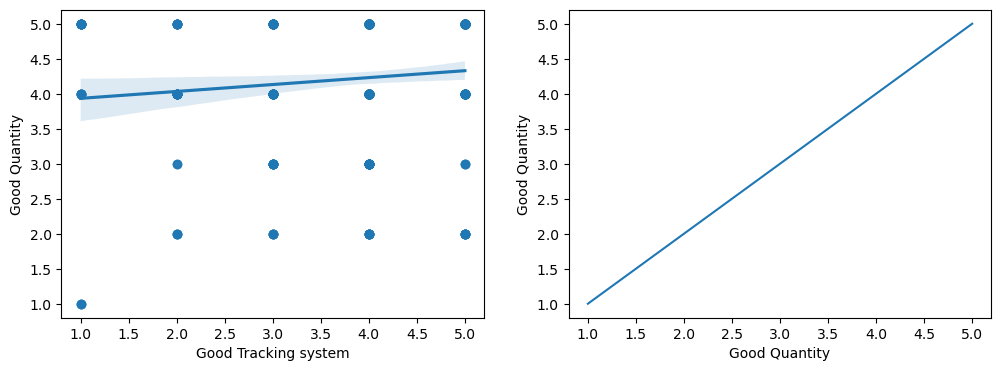

In [12]:
ig, axes = plt.subplots(figsize=(12, 4), ncols=2)
sns.regplot(x = "Good Tracking system", y = "Good Quantity" , data= df , ax=axes[0])
sns.lineplot(x="Good Quantity", y="Good Quantity",   estimator = 'mean',   data=df,errorbar=None, ax=axes[1])
plt.show()

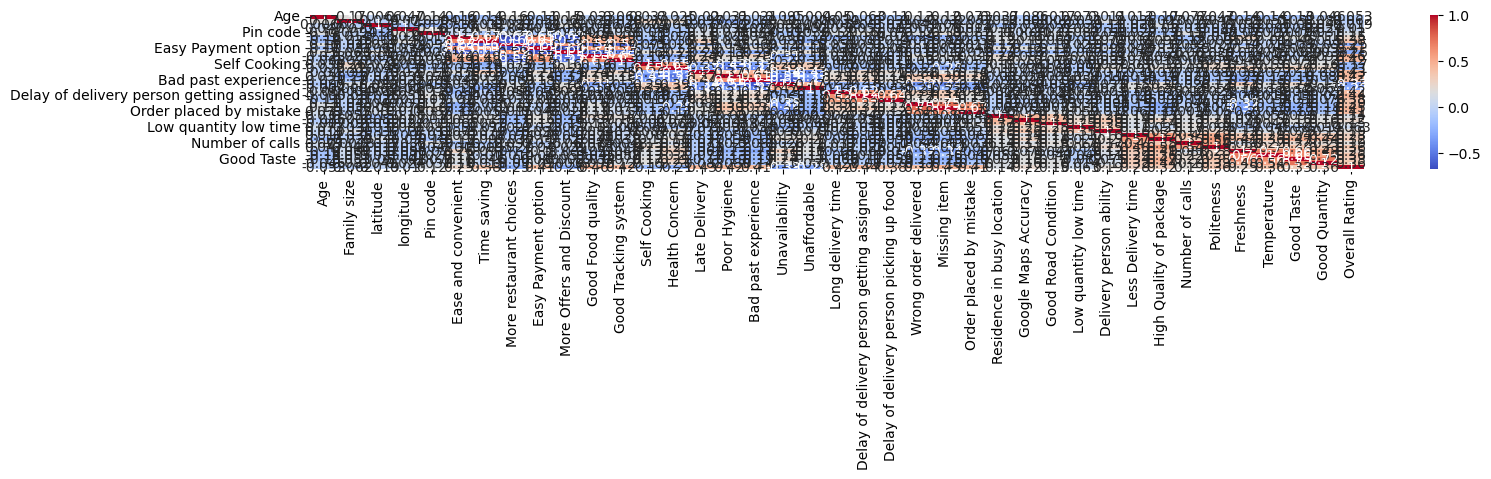

In [13]:
numeric_columns = df.select_dtypes(include='number')

# Create a new DataFrame with only numeric values
numeric_df = df[numeric_columns.columns]

correlation_matrix = numeric_df.corr(numeric_only = True, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix['Age'].transpose()
plt.figure(figsize=(17,2))
subset_correlation_matrix = numeric_df.corr()
sns.heatmap(data=subset_correlation_matrix,cmap='coolwarm', annot=True, xticklabels=numeric_df.columns.tolist())
plt.show()

<Axes: >

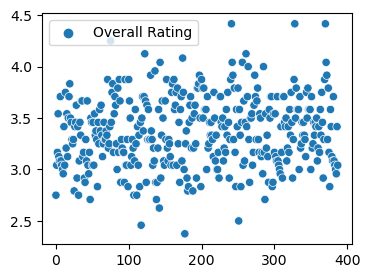

In [14]:
plt.figure(figsize=(4,3))  #figure size
sns.scatterplot(data = df[['Overall Rating']])

In [15]:
med_df = df.groupby('Residence in busy location')[['Long delivery time']].count()  #evry year the sum of people impact
med_df

,Long delivery time
Residence in busy location,
1,9
2,35
3,50
4,266
5,28


In [16]:
men_df = df.groupby('Age')[["Over All Satisfaction"]].mean().head(10)    #evry year the sum of people impact
top_5 = men_df.sort_values(by="Over All Satisfaction", ascending=False).head(10)
top_5

KeyError: "Columns not found: 'Over All Satisfaction'"